<a href="https://colab.research.google.com/github/Imran1hp/rossman-store-sale-prediction-ML/blob/main/Rossmann_store_sales_prob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install numpy pandas-profiling matplotlib plotly seaborn --quiet

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import os
import matplotlib
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
od.download('https://www.kaggle.com/c/rossmann-store-sales')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: imranlaskar123
Your Kaggle Key: ··········


100%|██████████| 6.99M/6.99M [00:00<00:00, 933MB/s]


Extracting archive ./rossmann-store-sales/rossmann-store-sales.zip to ./rossmann-store-sales


In [ ]:
os.listdir('rossmann-store-sales')

['test.csv', 'sample_submission.csv', 'store.csv', 'train.csv']

In [ ]:
ross_df = pd.read_csv("./rossmann-store-sales/train.csv",low_memory=False)


In [ ]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
store_df = pd.read_csv('./rossmann-store-sales/store.csv')


In [ ]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
merged_df.shape

(1017209, 18)

In [ ]:
test_df=pd.read_csv('./rossmann-store-sales/test.csv')

In [ ]:
merged_test_df = test_df.merge(store_df, how='left',on = 'Store')

In [ ]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
round(merged_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


In [ ]:
merged_df.duplicated().sum()

np.int64(0)

In [ ]:
merged_df['Date'] = pd.to_datetime(merged_df.Date)


In [ ]:
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)

In [ ]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [ ]:
merged_df.Date.min(),merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

<Axes: xlabel='Sales', ylabel='Count'>

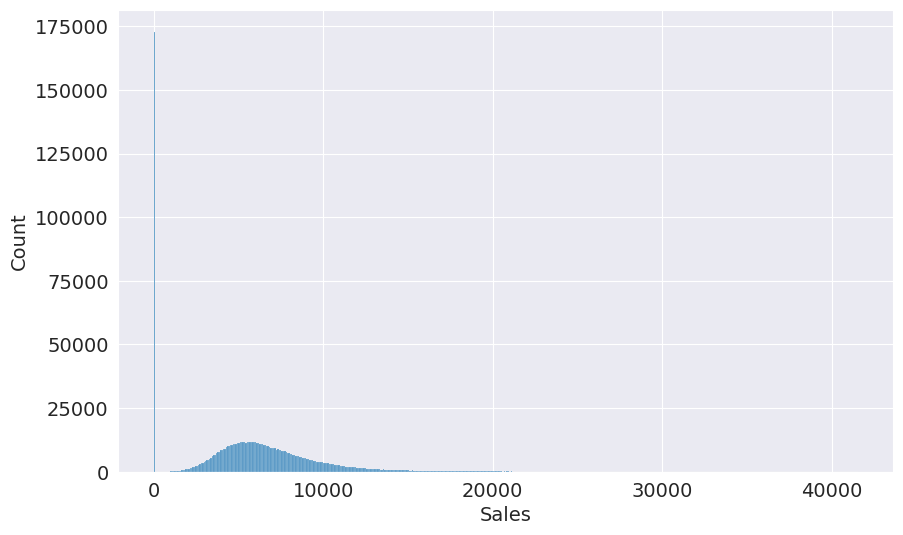

In [ ]:
sns.histplot(data=merged_df, x='Sales')

In [ ]:
merged_df.Sales.value_counts()[0]

np.int64(172871)

In [ ]:
merged_df.Open.value_counts()

,count
Open,
1,844392
0,172817


In [ ]:
merged_df = merged_df[merged_df.Open ==1].copy()

In [ ]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN


<Axes: xlabel='Sales', ylabel='Count'>

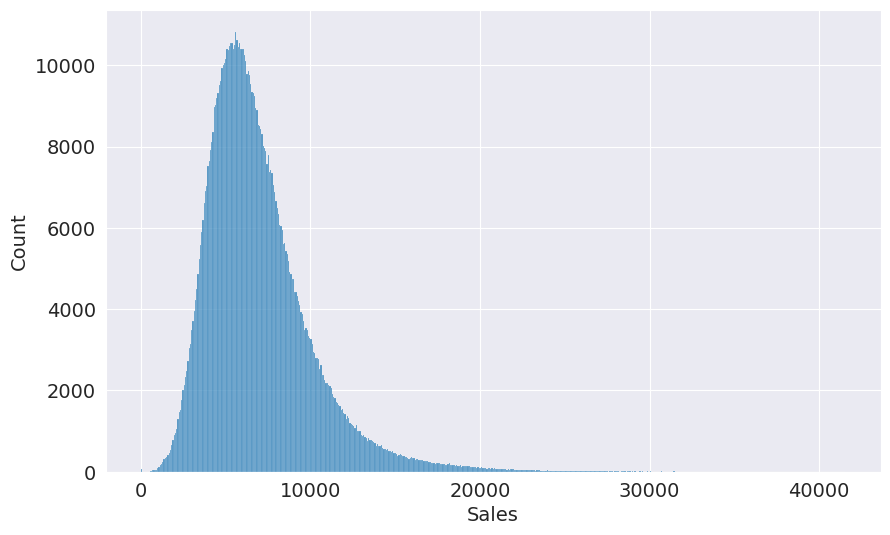

In [ ]:
sns.histplot(data=merged_df, x='Sales')

<Axes: xlabel='Sales', ylabel='Customers'>

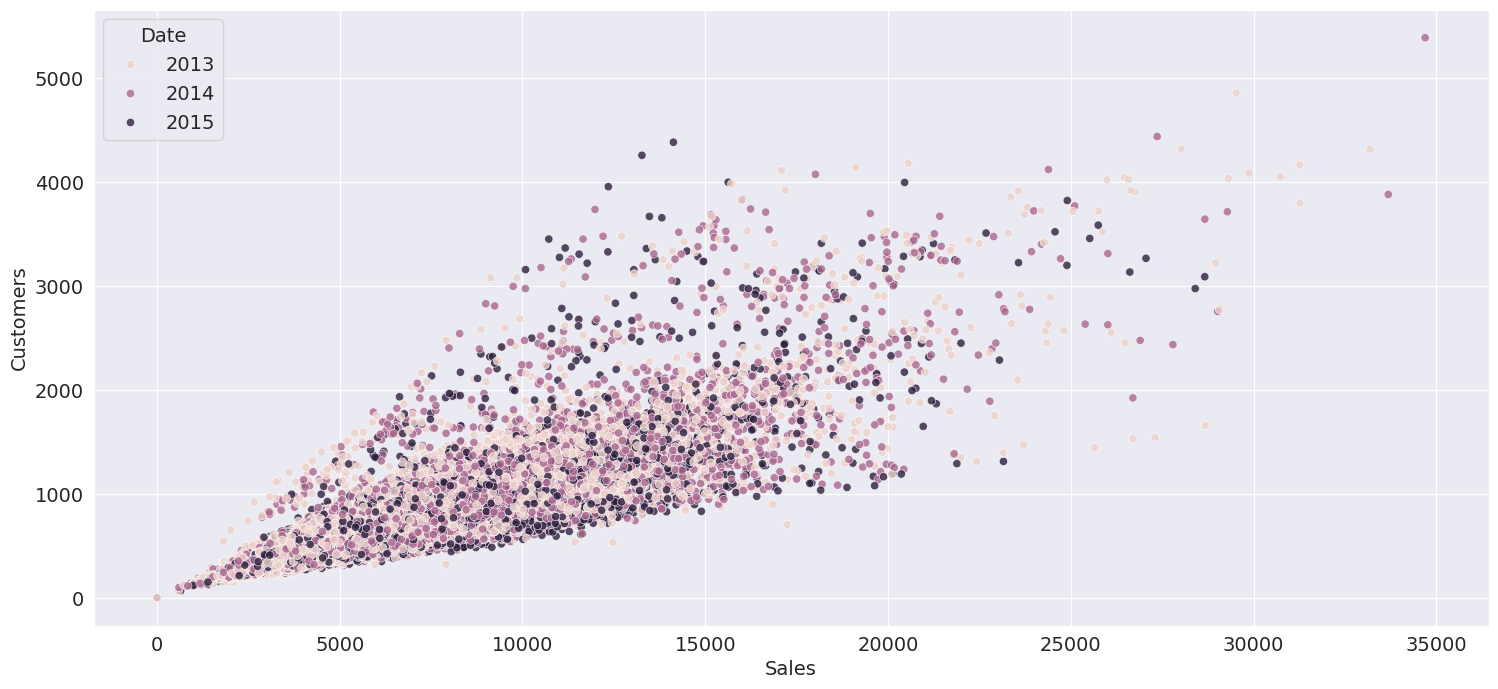

In [ ]:
plt.figure(figsize =(18,8))
temp_df = merged_df.sample(40000).copy()
temp_df['Date'] = pd.to_datetime(temp_df['Date'])
sns.scatterplot(x=temp_df.Sales,y=temp_df.Customers,hue=temp_df.Date.dt.year,alpha=0.8)

<Axes: xlabel='Store', ylabel='Sales'>

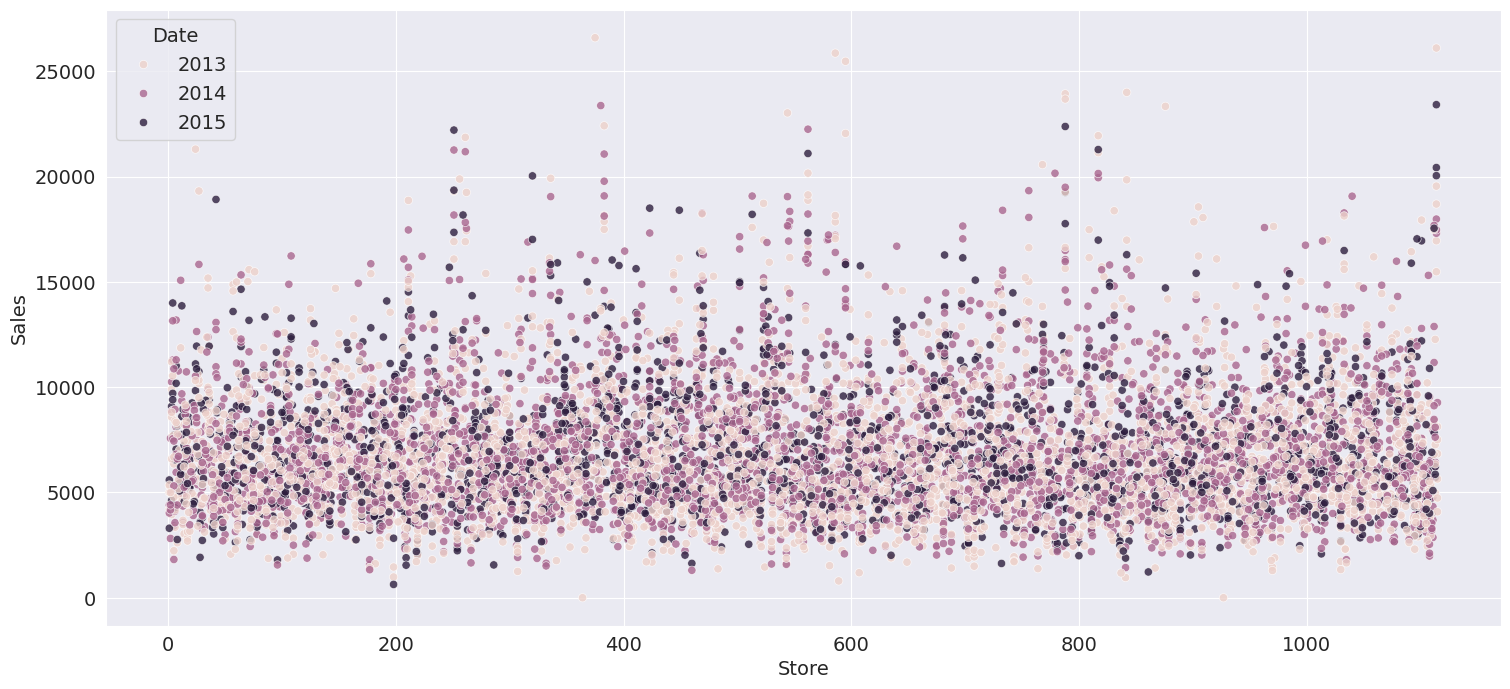

In [ ]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(10000)
temp_df['Date'] = pd.to_datetime(temp_df['Date'])
sns.scatterplot(x=temp_df.Store , y=temp_df.Sales,hue=temp_df.Date.dt.year,alpha=0.8)

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

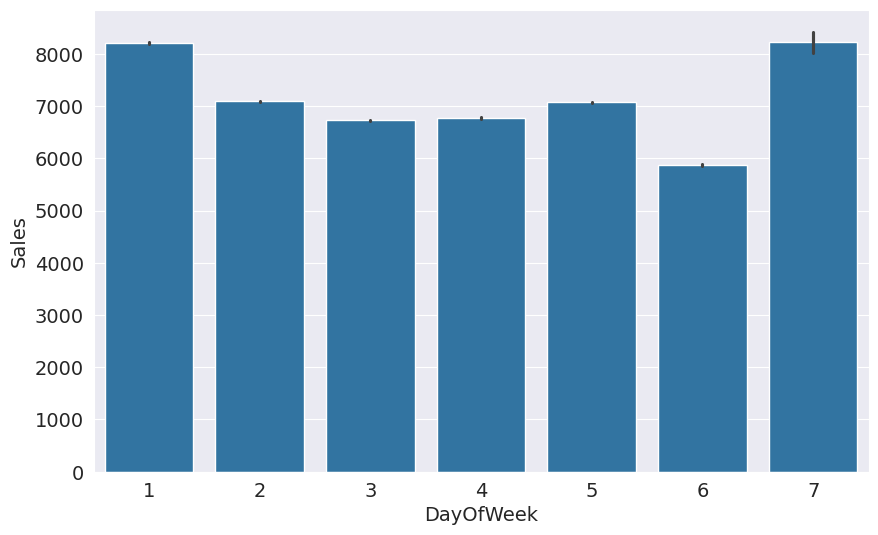

In [ ]:
sns.barplot(data=merged_df,x='DayOfWeek', y='Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

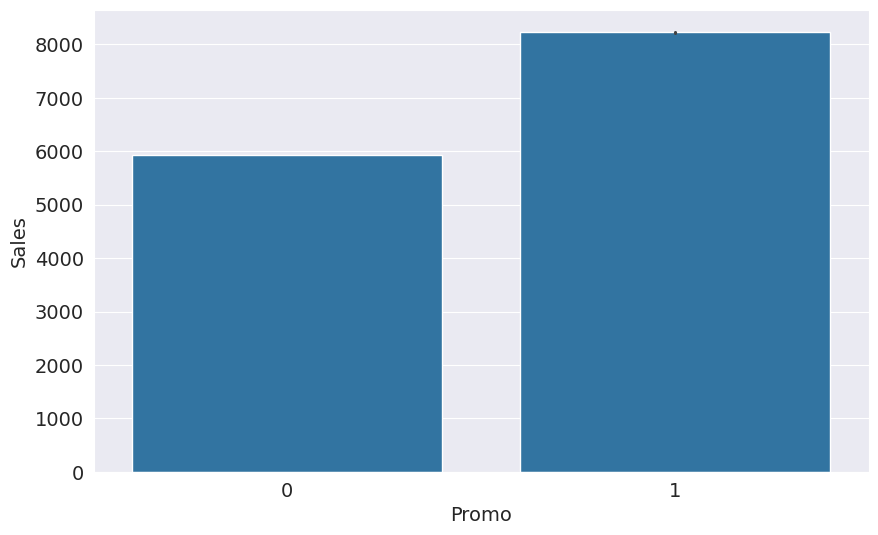

In [ ]:
sns.barplot(data=merged_df, x = 'Promo',y='Sales')

In [ ]:
merged_df.drop(['Date', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], axis=1).corr()['Sales'].sort_values(ascending=False)

,Sales
Sales,1.000000
Customers,0.823597
Promo,0.368145
Promo2SinceWeek,0.095311
SchoolHoliday,0.038617
CompetitionOpenSinceYear,0.016101
Store,0.007710
Promo2SinceYear,-0.034713
CompetitionDistance,-0.036396
CompetitionOpenSinceMonth,-0.043489


In [ ]:

merged_df['Day']= merged_df.Date.dt.day
merged_df["Month"]=merged_df.Date.dt.month
merged_df['Year']= merged_df.Date.dt.year

In [ ]:
merged_test_df['Day']=merged_df.Date.dt.day
merged_test_df['Month']=merged_df.Date.dt.month
merged_test_df['Year']=merged_df.Date.dt.year

<Axes: xlabel='Year', ylabel='Sales'>

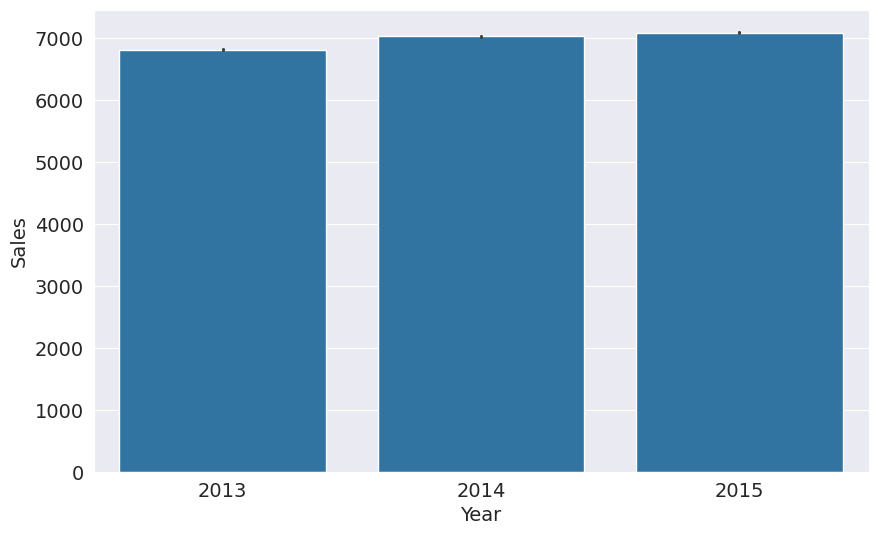

In [ ]:
sns.barplot(data=merged_df,x='Year',y="Sales")

<Axes: xlabel='Month', ylabel='Sales'>

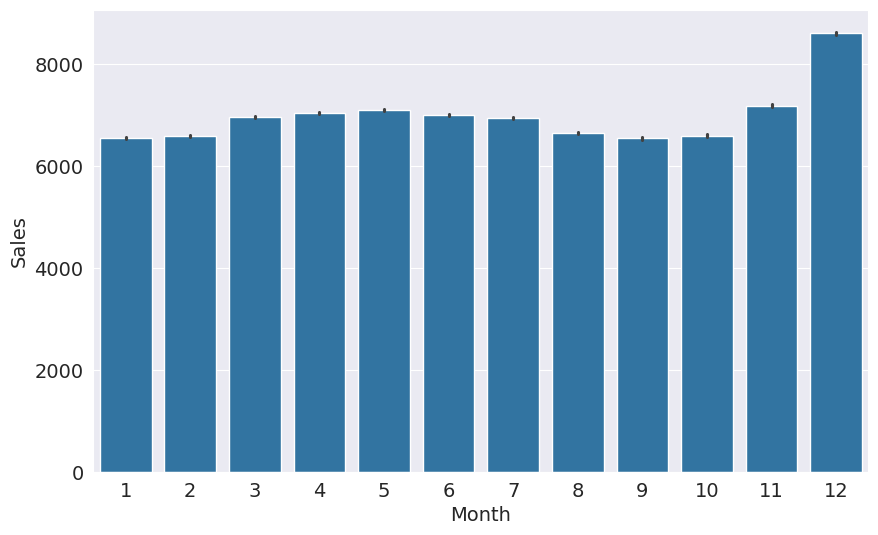

In [ ]:
sns.barplot(data=merged_df,x='Month',y='Sales')

<Axes: xlabel='Day', ylabel='Sales'>

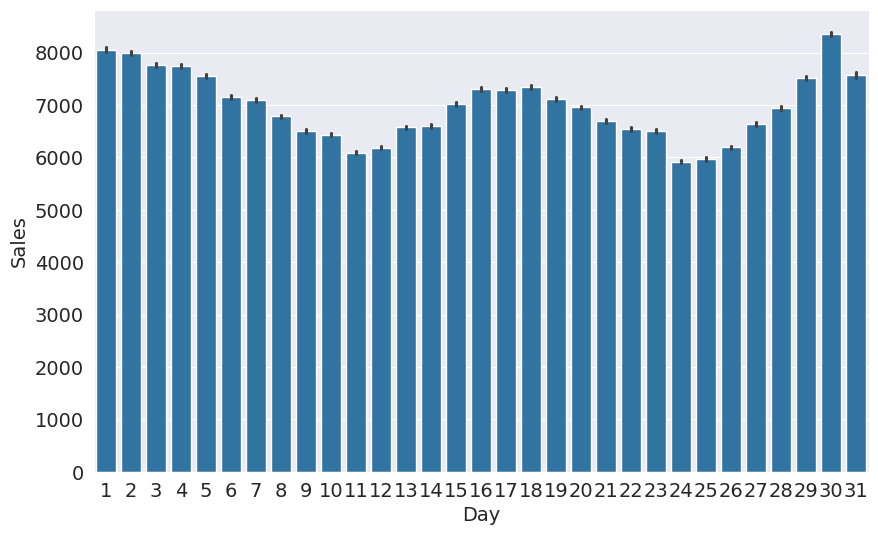

In [ ]:
sns.barplot(data = merged_df,x='Day',y='Sales')

In [ ]:
len(merged_df)

844392

In [ ]:
train_size = int(.75 *len(merged_df))

In [ ]:
train_size

633294

In [ ]:
sorted_df=merged_df.sort_values('Date')

In [ ]:
train_df,val_df = sorted_df[:train_size],sorted_df[train_size:]

In [ ]:
len(train_df),len(val_df)

(633294, 211098)

In [ ]:
train_df.Date.min(),train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [ ]:
val_df.Date.min(),val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [ ]:
merged_test_df.Date.min(),merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [ ]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1,b,...,720.0,3.0,2002.0,0,NaN,NaN,NaN,1,1,2013
1016179,85,2,2013-01-01,4220,619,1,0,a,1,b,...,1870.0,10.0,2011.0,0,NaN,NaN,NaN,1,1,2013
1016353,259,2,2013-01-01,6851,1444,1,0,a,1,b,...,210.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,...,1180.0,5.0,2013.0,0,NaN,NaN,NaN,1,1,2013
1016368,274,2,2013-01-01,3102,729,1,0,a,1,b,...,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,745,3,2014-12-10,6897,657,1,0,0,0,a,...,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",10,12,2014
256642,756,3,2014-12-10,15736,2292,1,0,0,0,a,...,50.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
256634,747,3,2014-12-10,7444,608,1,0,0,0,c,...,45740.0,8.0,2008.0,0,NaN,NaN,NaN,10,12,2014
256633,746,3,2014-12-10,5207,474,1,0,0,0,d,...,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",10,12,2014


In [ ]:
list(train_df.columns)

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval',
 'Day',
 'Month',
 'Year']

In [ ]:
inputs_cols =['Store','DayOfWeek','Promo','StateHoliday','StoreType','Assortment','Day','Month','Year']

In [ ]:
target_col = 'Sales'

In [ ]:
merged_df[inputs_cols].nunique()

,0
Store,1115
DayOfWeek,7
Promo,2
StateHoliday,4
StoreType,4
Assortment,3
Day,31
Month,12
Year,3


In [ ]:
train_inputs = train_df[inputs_cols].copy()
train_target = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[inputs_cols].copy()
val_target = val_df[target_col].copy()

In [ ]:
val_inputs

,Store,DayOfWeek,Promo,StateHoliday,StoreType,Assortment,Day,Month,Year
256637,751,3,0,0,a,a,10,12,2014
256638,752,3,0,0,a,a,10,12,2014
256639,753,3,0,0,d,c,10,12,2014
256640,754,3,0,0,c,c,10,12,2014
256635,748,3,0,0,d,a,10,12,2014
...,...,...,...,...,...,...,...,...,...
744,745,5,1,0,a,a,31,7,2015
745,746,5,1,0,d,c,31,7,2015
746,747,5,1,0,c,c,31,7,2015
740,741,5,1,0,d,c,31,7,2015


In [ ]:
val_target

,Sales
256637,3720
256638,4258
256639,7170
256640,7359
256635,4579
...,...
744,8363
745,9082
746,10708
740,11253


In [ ]:
test_inputs = merged_test_df[inputs_cols].copy()

In [ ]:
numeric_cols =['Store','Day','Month','Year']
categorical_cols =['DayOfWeek','Promo','StateHoliday','StoreType','Assortment']

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean').fit(train_inputs[  numeric_cols])

In [ ]:
train_inputs[numeric_cols]= imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
Scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols]=Scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=Scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = Scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs

,Store,DayOfWeek,Promo,StateHoliday,StoreType,Assortment,Day,Month,Year
1017190,0.983842,2,0,a,b,b,0.0,0.0,0.0
1016179,0.075404,2,0,a,b,a,0.0,0.0,0.0
1016353,0.231598,2,0,a,b,b,0.0,0.0,0.0
1016356,0.234291,2,0,a,b,a,0.0,0.0,0.0
1016368,0.245063,2,0,a,b,b,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
256632,0.667864,3,0,0,a,a,0.3,1.0,1.0
256642,0.677738,3,0,0,a,c,0.3,1.0,1.0
256634,0.669659,3,0,0,c,c,0.3,1.0,1.0
256633,0.668761,3,0,0,d,c,0.3,1.0,1.0


In [ ]:
val_inputs

,Store,DayOfWeek,Promo,StateHoliday,StoreType,Assortment,Day,Month,Year
256637,0.673250,3,0,0,a,a,0.3,1.000000,1.0
256638,0.674147,3,0,0,a,a,0.3,1.000000,1.0
256639,0.675045,3,0,0,d,c,0.3,1.000000,1.0
256640,0.675943,3,0,0,c,c,0.3,1.000000,1.0
256635,0.670557,3,0,0,d,a,0.3,1.000000,1.0
...,...,...,...,...,...,...,...,...,...
744,0.667864,5,1,0,a,a,1.0,0.545455,2.0
745,0.668761,5,1,0,d,c,1.0,0.545455,2.0
746,0.669659,5,1,0,c,c,1.0,0.545455,2.0
740,0.664273,5,1,0,d,c,1.0,0.545455,2.0


In [ ]:
test_inputs

,Store,DayOfWeek,Promo,StateHoliday,StoreType,Assortment,Day,Month,Year
0,0.000000,4,1,0,c,a,1.0,0.545455,2.0
1,0.001795,4,1,0,a,a,1.0,0.545455,2.0
2,0.005386,4,1,0,a,c,1.0,0.545455,2.0
3,0.006284,4,1,0,a,a,1.0,0.545455,2.0
4,0.007181,4,1,0,a,c,1.0,0.545455,2.0
...,...,...,...,...,...,...,...,...,...
41083,0.996409,6,0,0,a,a,0.8,0.454545,2.0
41084,0.997307,6,0,0,c,c,0.8,0.454545,2.0
41085,0.998205,6,0,0,a,c,0.8,0.454545,2.0
41086,0.999102,6,0,0,a,c,0.8,0.454545,2.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [ ]:
train_inputs

,Store,DayOfWeek,Promo,StateHoliday,StoreType,Assortment,Day,Month,Year,DayOfWeek_1,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.983842,2,0,a,b,b,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.075404,2,0,a,b,a,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.231598,2,0,a,b,b,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.234291,2,0,a,b,a,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.245063,2,0,a,b,b,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,0.667864,3,0,0,a,a,0.3,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256642,0.677738,3,0,0,a,c,0.3,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
256634,0.669659,3,0,0,c,c,0.3,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
256633,0.668761,3,0,0,d,c,0.3,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
x_train = train_inputs[numeric_cols + encoded_cols]
x_val  = val_inputs[numeric_cols + encoded_cols]
x_test =  test_inputs[numeric_cols + encoded_cols]

In [ ]:
x_train

,Store,Day,Month,Year,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.983842,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.075404,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.231598,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.234291,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.245063,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,0.667864,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256642,0.677738,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
256634,0.669659,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
256633,0.668761,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
def return_mean(inputs):
  return np.full(len(inputs),merged_df.Sales.mean())

In [ ]:
train_preds = return_mean(x_train)

In [ ]:
train_preds

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(train_preds,train_target))

np.float64(3082.450443277419)

In [ ]:
np.sqrt(mean_squared_error(return_mean(x_val),val_target))

np.float64(3168.6033635047716)

In [ ]:
def guess_random(inputs):
  lo, hi =merged_df.Sales.min(),merged_df.Sales.max()
  return np.random.random(len(inputs))*(hi-lo)+lo

In [ ]:
train_preds = guess_random(x_train)

In [ ]:
train_preds

array([ 4747.83400872,  1098.09329675, 19733.58547218, ...,
       41365.63011887, 18268.17855076,  6412.58474129])

In [ ]:
np.sqrt(mean_squared_error(guess_random(x_train),train_target))

np.float64(18636.649023980826)

In [ ]:
np.sqrt(mean_squared_error(guess_random(x_val),val_target))

np.float64(18397.70971440814)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression()

In [ ]:
linreg.fit(x_train,train_target)

LinearRegression()

In [ ]:
train_preds = linreg.predict(x_train)
train_preds


array([ 7115.08762455, 10581.38651873,  7036.39236244, ...,
        6241.95353708,  5997.17125059,  5618.95124099])

In [ ]:
def error(inputs,targets):
  preds = linreg.predict(inputs)
  return np.sqrt(mean_squared_error(preds,targets))

In [ ]:
error(x_train,train_target)

np.float64(2741.587191916578)

In [ ]:
error(x_val,val_target)

np.float64(2817.7797940117125)

In [ ]:
def try_model (model):
 model.fit(x_train,train_target)
 train_preds = model.predict(x_train)
 val_preds = model.predict(x_val)
 train_rmse = np.sqrt(mean_squared_error(train_target,train_preds))
 val_rmse = np.sqrt(mean_squared_error(val_target,val_preds))
 return train_rmse,val_rmse

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor

In [ ]:
try_model(LinearRegression())

(np.float64(2741.587191916578), np.float64(2817.7797940117125))

In [ ]:
try_model(Ridge())

(np.float64(2741.5871950814444), np.float64(2817.7784665409868))

In [ ]:
try_model(Lasso())

(np.float64(2741.7143904640566), np.float64(2817.9472924045217))

In [ ]:
try_model(ElasticNet())

(np.float64(2879.0432103903954), np.float64(2972.6658860503385))

In [ ]:
try_model(SGDRegressor())

(np.float64(2741.9377909936848), np.float64(2816.0749966178732))

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [ ]:
tree = DecisionTreeRegressor(random_state = 42)
try_model(tree)


(np.float64(0.0), np.float64(1559.7378600480247))

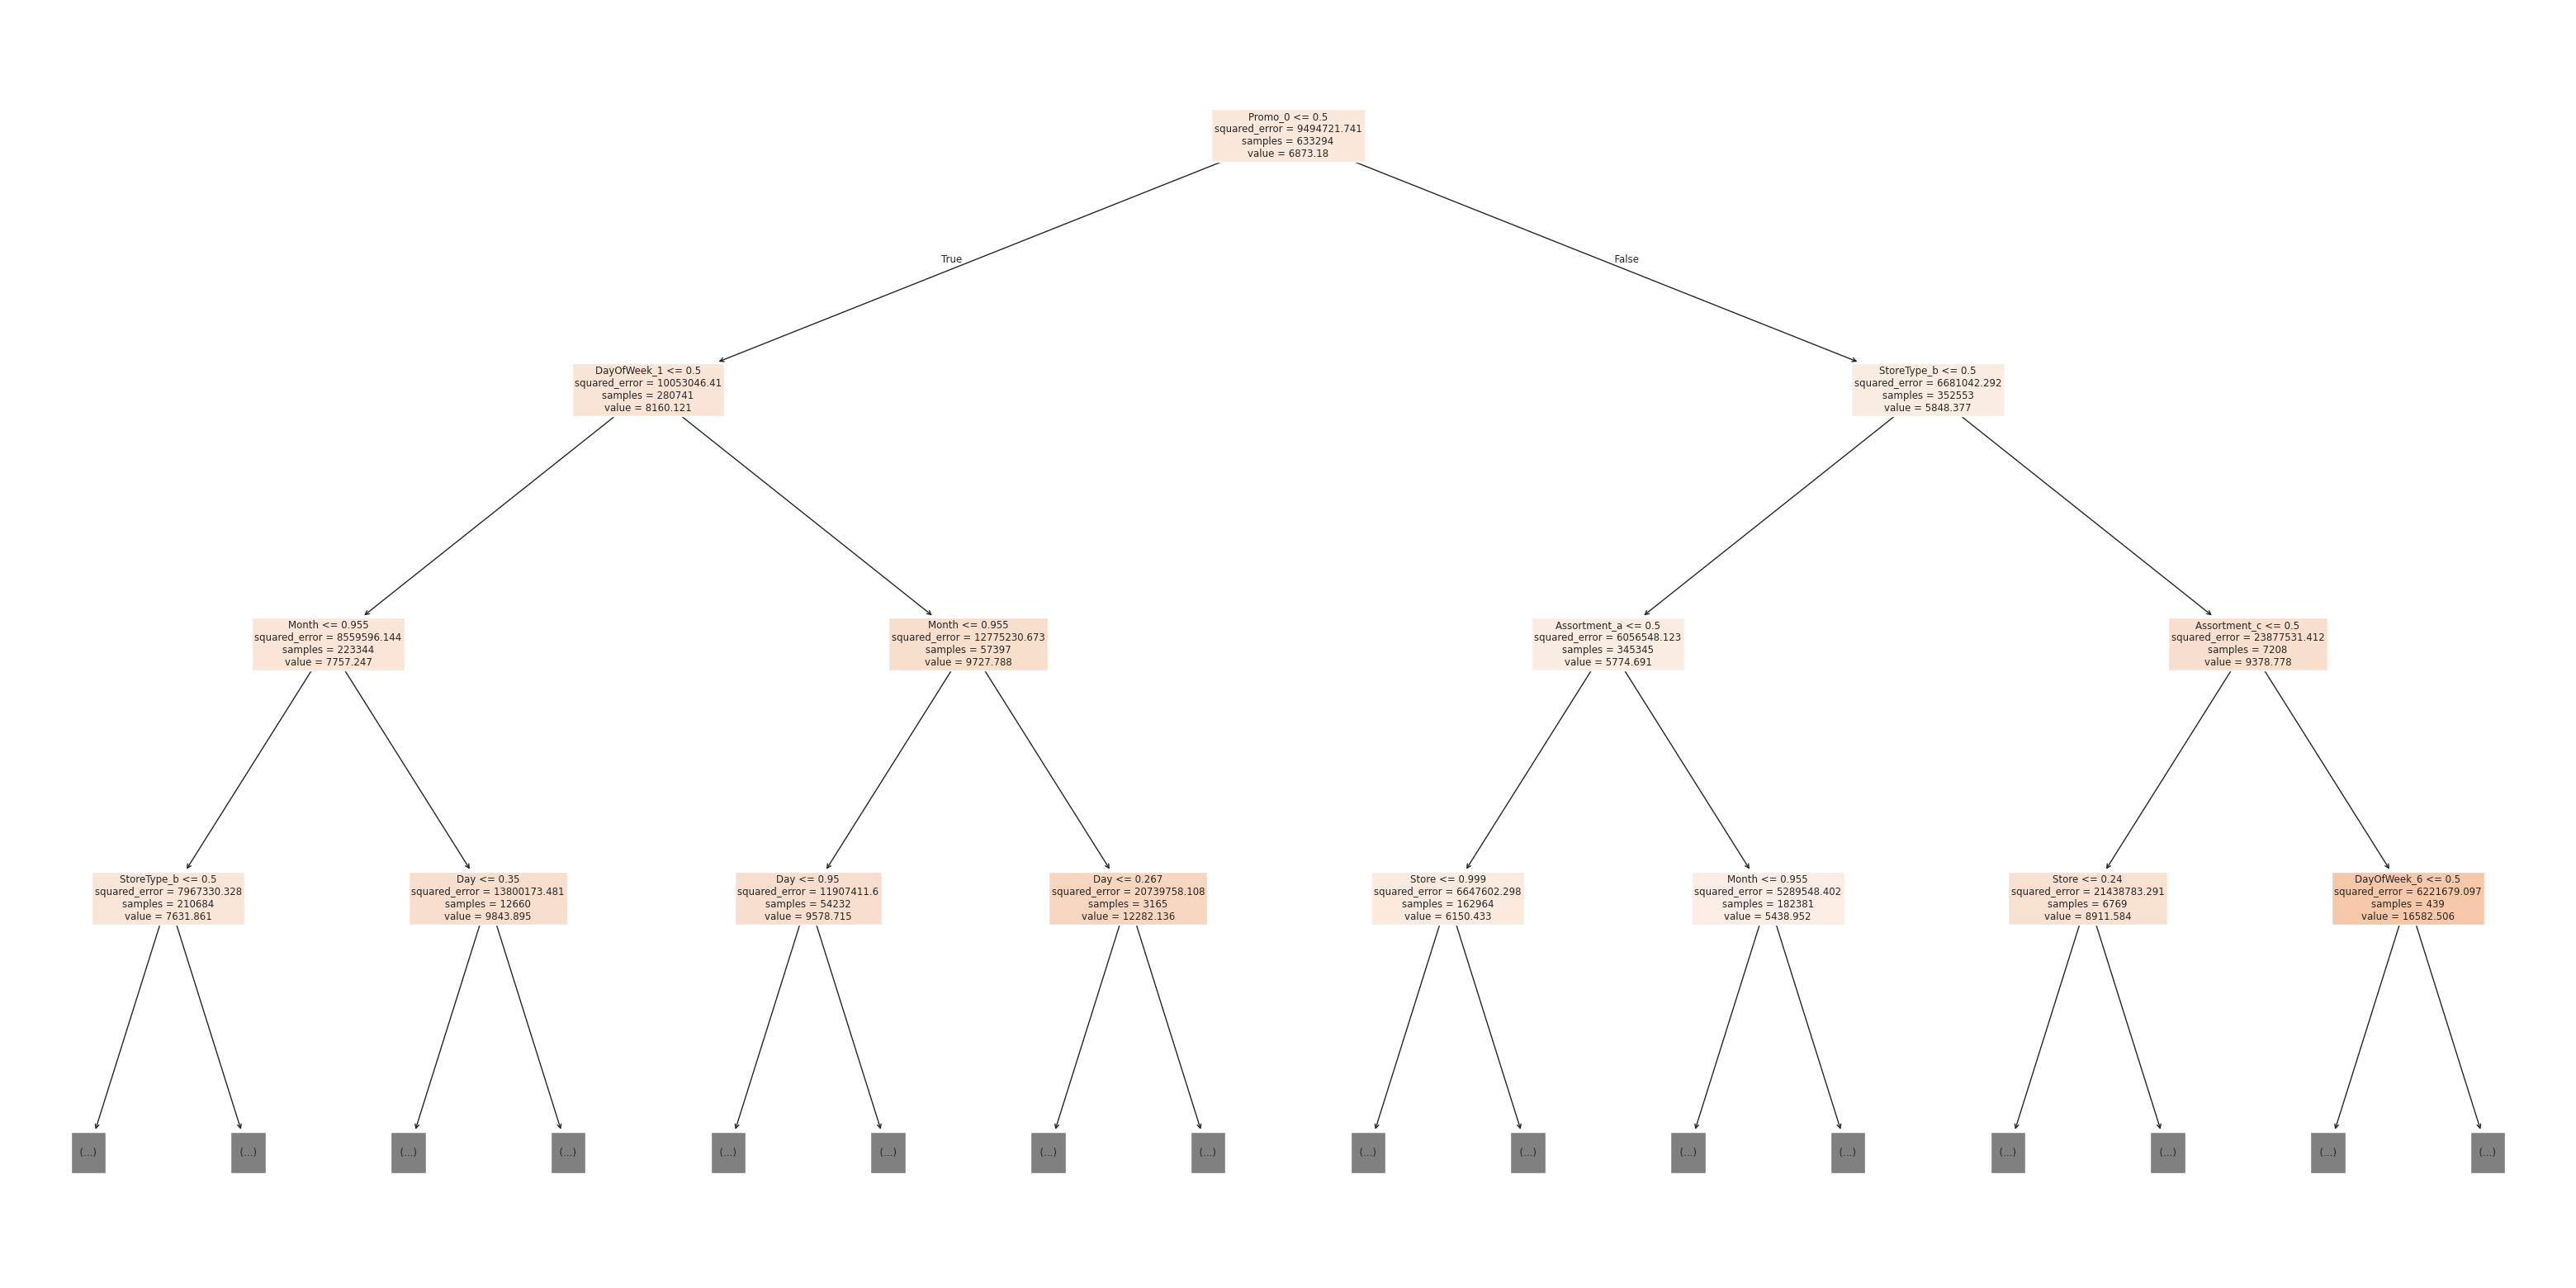

In [ ]:
plt.figure(figsize=(40,20))
plot_tree(tree,max_depth=3,filled=True,feature_names=x_train.columns)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(random_state=42, n_jobs =-1)
try_model(rf)

(np.float64(474.9198974666898), np.float64(1371.7321923469985))

In [ ]:
rf.feature_importances_

array([6.07412101e-01, 4.88393196e-02, 4.71254150e-02, 9.30282826e-03,
       3.36941035e-02, 4.40591456e-03, 2.43735761e-03, 2.11467096e-03,
       5.71418981e-03, 6.96554452e-03, 4.47739863e-03, 5.83469269e-02,
       8.05201285e-02, 1.18767484e-03, 2.11472202e-04, 2.45172539e-05,
       1.88388455e-05, 1.38995265e-02, 2.25678813e-02, 1.04169805e-02,
       1.39945667e-02, 8.34303630e-03, 5.50125164e-03, 1.24783549e-02])

In [ ]:
x_train.columns

Index(['Store', 'Day', 'Month', 'Year', 'DayOfWeek_1', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'DayOfWeek_7', 'Promo_0', 'Promo_1', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c'],
      dtype='object')

In [ ]:
importance_df = pd.DataFrame({
    "feature":numeric_cols+encoded_cols,
    "importance":rf.feature_importances_
}).sort_values('importance',ascending=False)
importance_df.head(10)


,feature,importance
0,Store,0.607412
12,Promo_1,0.080520
11,Promo_0,0.058347
1,Day,0.048839
2,Month,0.047125
4,DayOfWeek_1,0.033694
18,StoreType_b,0.022568
20,StoreType_d,0.013995
17,StoreType_a,0.013900
23,Assortment_c,0.012478


<Axes: xlabel='importance', ylabel='feature'>

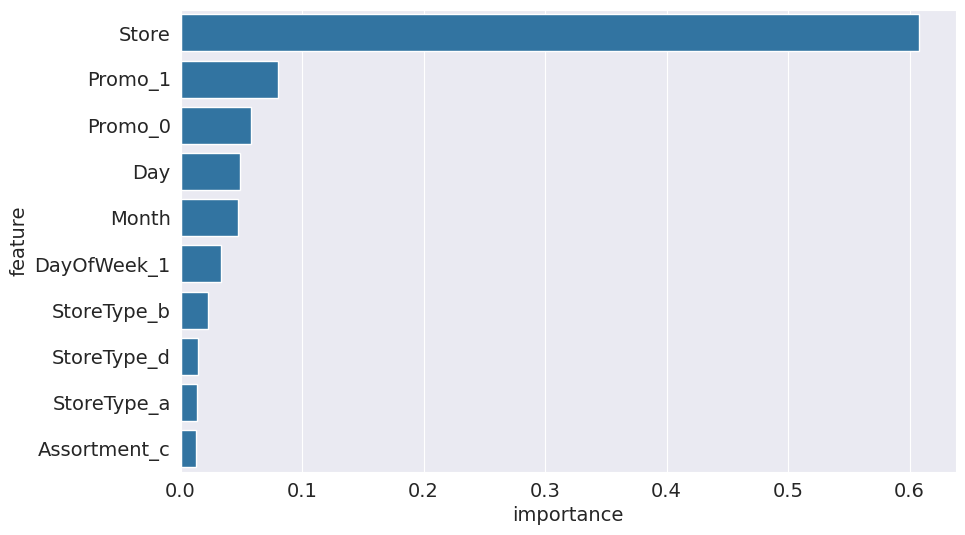

In [ ]:
sns.barplot(data = importance_df.head(10),x="importance",y='feature')

In [ ]:
def predict_input(model,single_input):
  if single_input['Open'] ==0:
    return 0
  input_df =pd.DataFrame([single_input])
  input_df["Date"] =pd.to_datetime(input_df.Date)
  input_df['Day'] = input_df.Date.dt.day
  input_df['Month'] = input_df.Date.dt.month
  input_df['Year'] = input_df.Date.dt.year
  input_df [numeric_cols] = imputer.transform(input_df[numeric_cols])
  input_df[numeric_cols] = Scaler.transform(input_df[numeric_cols])
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
  x_input = input_df[numeric_cols + encoded_cols]
  pred =model.predict(x_input)
  return pred

In [ ]:

sample_input = {'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': np.nan,
 'Promo2SinceYear': np.nan,
 'PromoInterval': np.nan}

sample_input


{'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': nan,
 'Promo2SinceYear': nan,
 'PromoInterval': nan}

In [ ]:
predict_input(rf,sample_input)

array([4258.01])

In [ ]:
test_preds = rf.predict(x_test)
test_preds

array([ 6332.13,  8330.7 , 12227.79, ...,  5481.37, 20046.36,  6911.75])

In [ ]:
submission_df = pd.read_csv('./rossmann-store-sales/sample_submission.csv')

In [ ]:
submission_df["Sales"] = test_preds * test_df['Open'].astype('float')

In [ ]:
submission_df.fillna(0,inplace=True)

In [ ]:
submission_df.to_csv('submission.csv',index=None)

In [ ]:
from IPython.display import FileLink

In [ ]:
FileLink('submission.csv')

/content/submission.csv